# MRF Stock Prediction - LSTM



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset=pd.read_csv("MRF.NS.csv")
display(dataset)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,910.000000,910.0,880.000000,897.599976,815.841370,426.0
1,2002-07-02,900.000000,905.0,895.000000,903.650024,821.340393,310.0
2,2002-07-03,910.000000,910.0,900.000000,906.700012,824.112366,336.0
3,2002-07-04,920.000000,925.0,910.000000,916.799988,833.292358,591.0
4,2002-07-05,915.000000,935.0,910.000000,927.299988,842.836182,1623.0
...,...,...,...,...,...,...,...
4788,2021-09-23,80600.000000,80999.0,80001.546875,80220.703125,80220.703125,6530.0
4789,2021-09-24,80500.000000,80690.0,79055.046875,79456.500000,79456.500000,11095.0
4790,2021-09-27,79949.000000,82000.0,79144.648438,81893.398438,81893.398438,20927.0
4791,2021-09-28,81759.398438,81890.0,79810.000000,80488.601563,80488.601563,14053.0


In [3]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset=dataset.sort_values('Date',ascending=True).reset_index(drop=True)
#dataset['Date']=dataset['Date'].astype(str)
display(dataset)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,910.000000,910.0,880.000000,897.599976,815.841370,426.0
1,2002-07-02,900.000000,905.0,895.000000,903.650024,821.340393,310.0
2,2002-07-03,910.000000,910.0,900.000000,906.700012,824.112366,336.0
3,2002-07-04,920.000000,925.0,910.000000,916.799988,833.292358,591.0
4,2002-07-05,915.000000,935.0,910.000000,927.299988,842.836182,1623.0
...,...,...,...,...,...,...,...
4788,2021-09-23,80600.000000,80999.0,80001.546875,80220.703125,80220.703125,6530.0
4789,2021-09-24,80500.000000,80690.0,79055.046875,79456.500000,79456.500000,11095.0
4790,2021-09-27,79949.000000,82000.0,79144.648438,81893.398438,81893.398438,20927.0
4791,2021-09-28,81759.398438,81890.0,79810.000000,80488.601563,80488.601563,14053.0


In [4]:
trainset=dataset.iloc[-1000:-100,1:2].values #Open
testset=dataset.iloc[-100:,1:2].values #Open 
real_stock_price = testset.copy()

In [5]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
print(training_scaled[0:5])
print(len(training_scaled))

[[0.31630423]
 [0.32917796]
 [0.3062237 ]
 [0.29699801]
 [0.31197299]]
900


In [6]:
x_train = []
y_train = []

In [7]:
for i in range(60,len(training_scaled)):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape,y_train.shape)

(840, 60) (840,)


In [8]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print('(samples, time steps, features) =',x_train.shape)

(samples, time steps, features) = (840, 60, 1)


In [9]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [10]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
regressor.fit(x_train,y_train,epochs =10, batch_size = 32)

Epoch 1/10
27/27 [==============================] - 2s 30ms/step - loss: nan
Epoch 2/10
27/27 [==============================] - 1s 30ms/step - loss: nan
Epoch 3/10
27/27 [==============================] - 1s 30ms/step - loss: nan
Epoch 4/10
27/27 [==============================] - 1s 31ms/step - loss: nan
Epoch 5/10
27/27 [==============================] - 1s 31ms/step - loss: nan
Epoch 6/10
27/27 [==============================] - 1s 31ms/step - loss: nan
Epoch 7/10
27/27 [==============================] - 1s 32ms/step - loss: nan
Epoch 8/10
27/27 [==============================] - 1s 36ms/step - loss: nan
Epoch 9/10
27/27 [==============================] - 1s 36ms/step - loss: nan
Epoch 10/10
27/27 [==============================] - 1s 35ms/step - loss: nan


In [11]:
inputs = dataset.iloc[len(trainset)-len(testset)-60:,1].values
print(inputs.shape)
print(inputs[0:10])

(4053,)
[2505.       2538.800049 2550.       2585.       2638.899902 2614.
 2559.       2587.699951 2550.       2550.      ]


In the context of a LSTM model, this reshaping may be necessary if the input data has only one feature (i.e., one time series) and the LSTM model expects a 3D input shape of (n_samples, n_time_steps, n_features). In this case, since there is only one feature, the shape does not change.

In [12]:
inputs = inputs.reshape(-1,1)
print(inputs.shape)

#sc = MinMaxScaler(feature_range = (0,1))
inputs = sc.transform(inputs)
print(inputs.shape)

(4053, 1)
(4053, 1)


In [13]:
x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
print(x_test.shape)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(3993, 60)
(3993, 60, 1)


In [14]:
predicted_price = regressor.predict(x_test)

125/125 [==============================] - 2s 9ms/step


In [15]:
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price.shape)

(3993, 1)


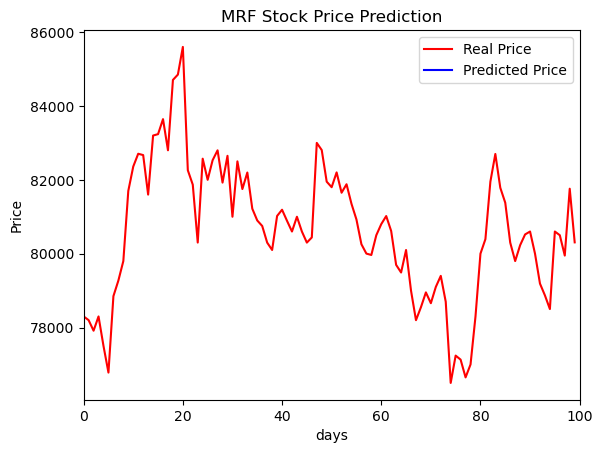

In [16]:
plt.plot(real_stock_price[-100:],color = 'red', label = 'Real Price')
plt.plot(predicted_price[-100:], color = 'blue', label = 'Predicted Price')
plt.title('MRF Stock Price Prediction')
plt.xlabel('days')
plt.ylabel('Price')
plt.xlim(0,100)  
plt.legend()
plt.show()

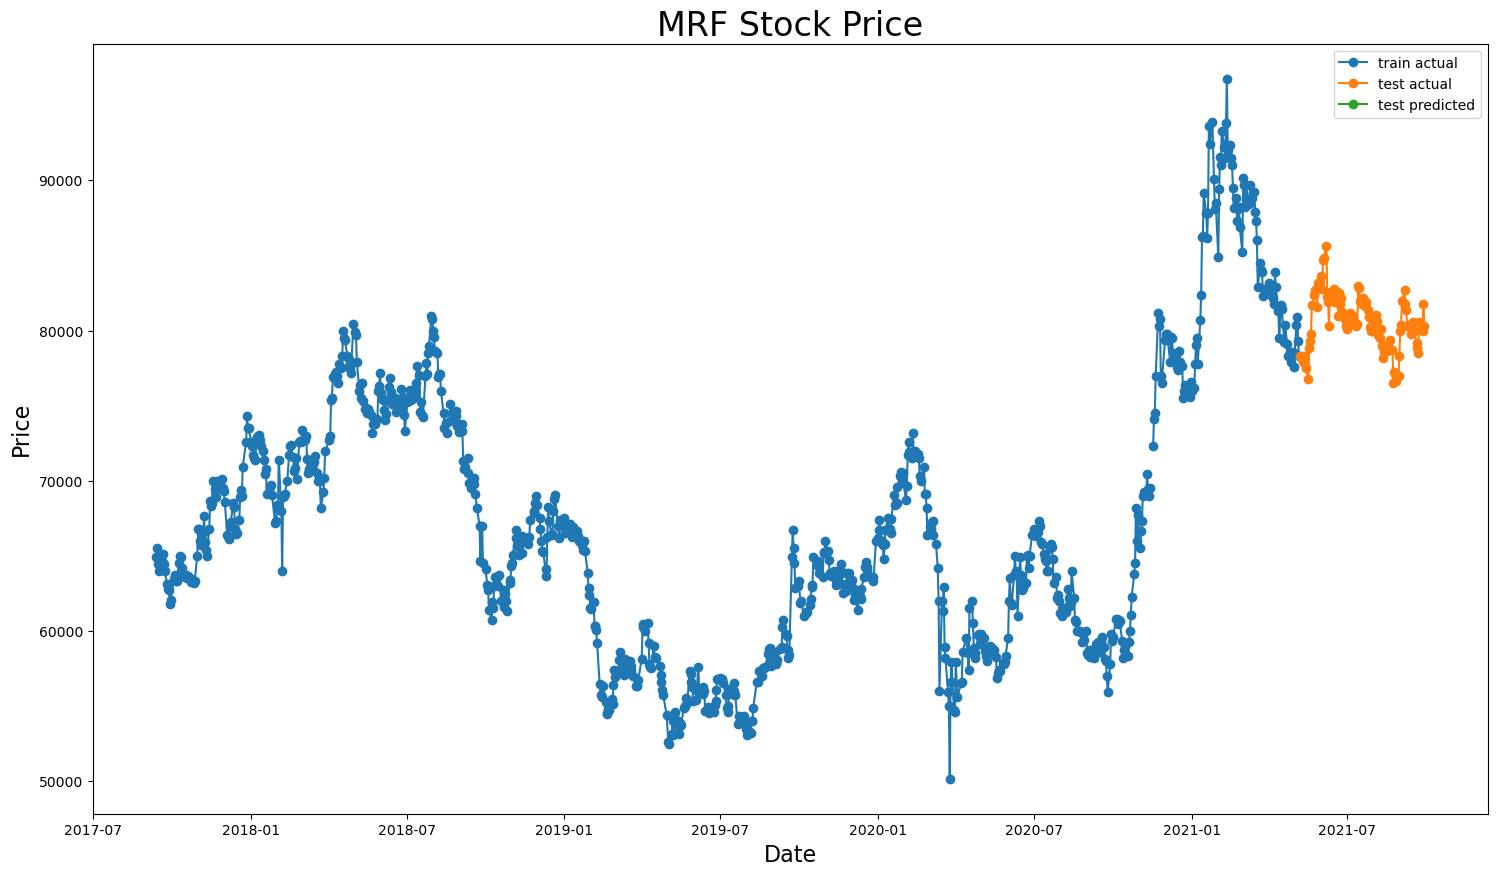

In [17]:
plt.figure(figsize=(18,10))
plt.plot(dataset.iloc[-1000:-100,0],trainset,'-o',label='train actual')
#plt.plot(dataset.iloc[-1000:-100,0],train_pred,'--',label='Prophet')
plt.plot(dataset.iloc[-100:,0],real_stock_price[-100:],'-o',label='test actual')
plt.plot(dataset.iloc[-100:,0],predicted_price[-100:],'-o',label='test predicted')
plt.title('MRF Stock Price',size=24)
plt.xlabel('Date',size=16)
plt.ylabel('Price',size=16)
plt.legend()
plt.show()

In [18]:
inputs = np.array(trainset[-60:])
new_predicted_price=[]
for i in range(100):
    x = np.reshape(inputs, (1,60,1))
    pred = regressor.predict(x)
    inputs = np.append(inputs, pred)
    inputs = inputs[1:]
    new_predicted_price+=[pred.reshape(-1)]

1/1 [==============================] - 0s 9ms/step


In [19]:
new_predicted_price = sc.inverse_transform(np.array(new_predicted_price))
print(new_predicted_price.shape)

(100, 1)


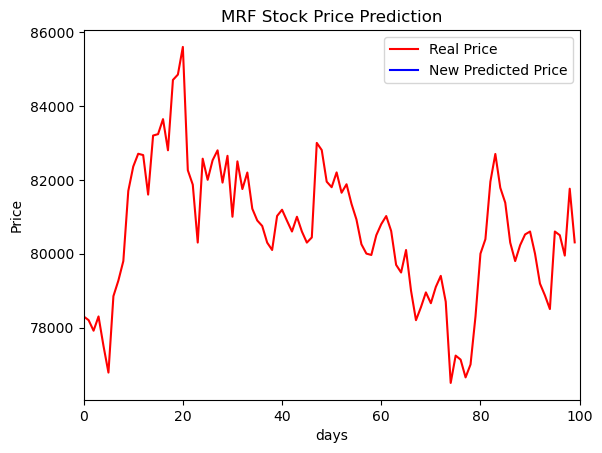

In [20]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(new_predicted_price, color = 'blue', label = 'New Predicted Price')
plt.title('MRF Stock Price Prediction')
plt.xlabel('days')
plt.ylabel('Price')
plt.xlim(0,100)  
plt.legend()
plt.show()

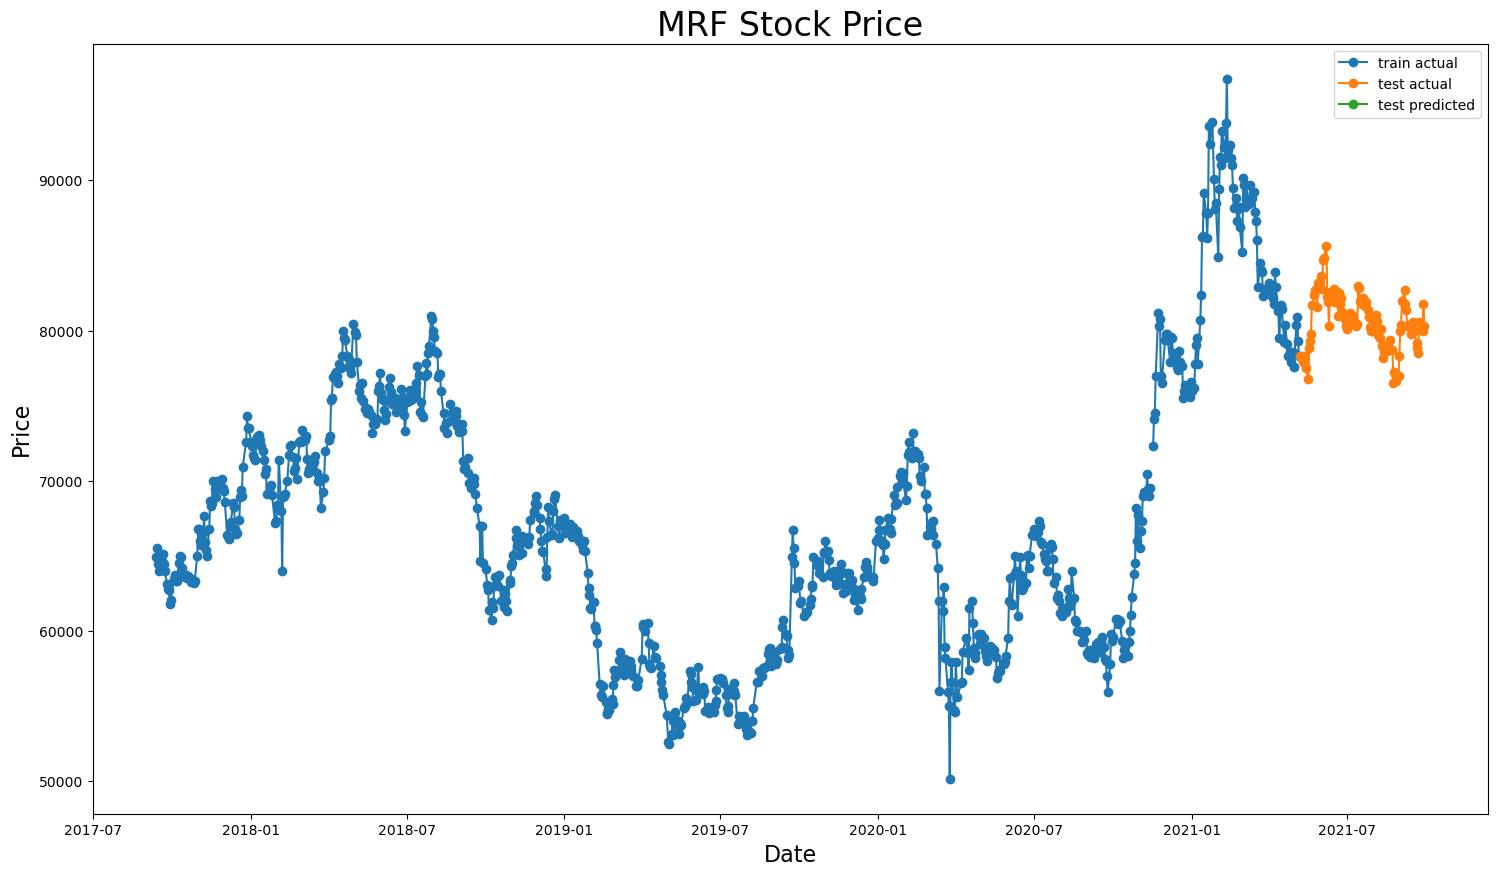

In [21]:
plt.figure(figsize=(18,10))
plt.plot(dataset.iloc[-1000:-100,0],trainset,'-o',label='train actual')
#plt.plot(dataset.iloc[-1000:-100,0],train_pred,'--',label='Prophet')
plt.plot(dataset.iloc[-100:,0],real_stock_price[-100:],'-o',label='test actual')
plt.plot(dataset.iloc[-100:,0],new_predicted_price[-100:],'-o',label='test predicted')
plt.title('MRF Stock Price',size=24)
plt.xlabel('Date',size=16)
plt.ylabel('Price',size=16)
plt.legend()
plt.show()